## A model for COVID 19 infection rate

ODE can be used to model change in any system. 

In this example, we can use ODEs to model the infection rate for COVID-19. This is a simple model that does not include many of the details that are now known about the disease. 

We consider a Susceptible-Exposed-Infectious-Removed (SEIR) model to describe the spread of the virus and compute the number of infected and dead individuals. The model is as follows

$$
\begin{align}
\frac{dS(t)}{dt} &= -\beta S(t)I(t) \\
\frac{dE(t)}{dt} &= \beta S(t)I(t) - \sigma E(t) \\
\frac{dI(t)}{dt} &= \sigma E(t) - \gamma I(t) \\
\frac{dR(t)}{dt} &= \gamma I(t)  \\
\end{align}
$$

where
- $S(t)$ -> Rate of individuals that are susceptible
- $E(t)$ -> Rate of individuals that are exposed
- $I(t)$ -> Rate of individuals that are infected
- $R(t)$ -> Rate of individuals that recovered 

and 
- $\beta$ -> Probability of disease transmission per contact (dimensionless)
- $\sigma$ -> Rate of progression from exposed to infectious
- $\gamma$ -> Recovery rate of infectious individuals

See:

Mwalili, Samuel, Mark Kimathi, Viona Ojiambo, Duncan Gathungu, and Rachel Mbogo. "SEIR model for COVID-19 dynamics incorporating the environment and social distancing." BMC Research Notes 13, no. 1 (2020): 1-5.

Cross, Paul C., James O. Lloyd‐Smith, Philip LF Johnson, and Wayne M. Getz. "Duelling timescales of host movement and disease recovery determine invasion of disease in structured populations." Ecology letters 8, no. 6 (2005): 587-595.

Li, Michael Y., and James S. Muldowney. "Global stability for the SEIR model in epidemiology." Mathematical biosciences 125, no. 2 (1995): 155-164.

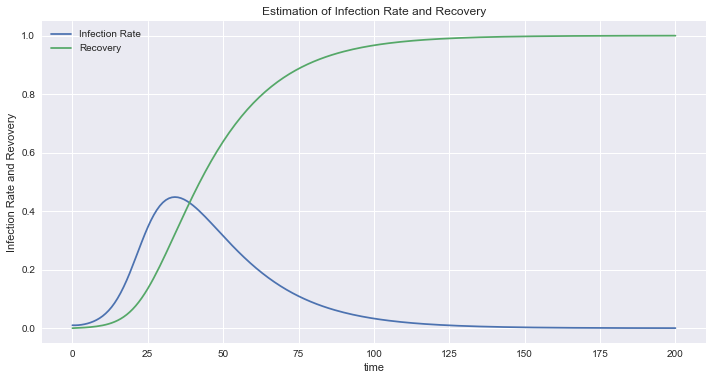

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

plt.style.use('seaborn')

def func(t,y,beta,sigma,gamma):
    s,e,i,r = y
    dsdt = -beta*s*i
    dedt = beta*s*i - sigma*e
    didt = sigma*e - gamma*i
    drdt = gamma*i
    
    return np.array([dsdt,dedt,didt,drdt])

h = 1
t_eval = np.arange(0, 200 + h, h)

beta = 0.8
sigma = 0.1
gamma = 0.05

i0 = 1e-2
s0 = 1-i0
e0 = 0
r0 = 0

init_cond = np.array([s0,e0,i0,r0])


sol = solve_ivp(func, [t_eval[0], t_eval[-1]], init_cond, t_eval=t_eval, args=(beta,sigma,gamma))

plt.figure(figsize = (10, 10))
plt.subplot(211)
plt.plot(sol.t, sol.y[2], label = 'Infection Rate')
plt.plot(sol.t, sol.y[3], label = 'Recovery')
plt.xlabel('time')
plt.ylabel('Infection Rate and Revovery')
plt.title('Estimation of Infection Rate and Recovery')
plt.legend()
plt.tight_layout()
plt.show()